In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/workspaces/AnjutkaVideo/V5__R_20180915_211343_drifts11.csv",delimiter="\t",na_values="(null)")

In [3]:
data.head(30)

,frameNumber,driftX,driftY,driftDistance,driftAngle,driftsCount,drifts,driftsNoOutliers,outlier
0,10,-6.0,43.0,43.416587,-82.874984,5,"['(-6,43)', '(-5,43)', '(-6,44)', '(-4,43)', '...","['(-6,43)', '(-5,43)', '(-6,44)', '(-4,43)', '...",NaN
1,15,-5.0,43.0,43.416587,-83.659808,5,"['(-6,43)', '(-5,43)', '(-5,44)', '(-3,42)', '...","['(-6,43)', '(-5,43)', '(-5,44)', '(-3,42)', '...",NaN
2,20,-6.0,43.0,43.737855,-82.874984,5,"['(-8,43)', '(-5,43)', '(-6,44)', '(-3,42)', '...","['(-8,43)', '(-5,43)', '(-6,44)', '(-3,42)', '...",NaN
3,25,-6.0,44.0,44.407207,-82.874984,5,"['(-8,44)', '(-5,44)', '(-6,44)', '(-2,41)', '...","['(-8,44)', '(-5,44)', '(-6,44)', '(-2,41)', '...",NaN
4,30,-6.0,43.0,43.737855,-82.874984,5,"['(-8,43)', '(-4,43)', '(-6,45)', '(-2,41)', '...","['(-8,43)', '(-4,43)', '(-6,45)', '(-2,41)', '...",NaN
5,35,-6.0,43.0,43.416587,-82.874984,5,"['(-9,43)', '(-4,43)', '(-6,44)', '(-1,40)', '...","['(-9,43)', '(-4,43)', '(-6,44)', '(-1,40)', '...",NaN
6,40,-6.0,43.0,43.416587,-82.874984,5,"['(-9,43)', '(-4,43)', '(-6,44)', '(-1,40)', '...","['(-9,43)', '(-4,43)', '(-6,44)', '(-1,40)', '...",NaN
7,45,-5.0,42.5,42.856579,-83.267396,6,"['(-6,43)', '(-8,43)', '(-3,42)', '(-5,44)', '...","['(-6,43)', '(-8,43)', '(-3,42)', '(-5,44)', '...",NaN
8,50,-5.0,42.0,42.755117,-83.659808,5,"['(-7,43)', '(-8,42)', '(-2,41)', '(-5,43)', '...","['(-7,43)', '(-8,42)', '(-2,41)', '(-5,43)', '...",NaN
9,55,-4.5,41.0,41.512468,-83.974608,6,"['(-7,43)', '(-9,41)', '(-2,41)', '(-5,43)', '...","['(-7,43)', '(-9,41)', '(-2,41)', '(-5,43)', '...",NaN


In [4]:
data.dtypes

frameNumber           int64
driftX              float64
driftY              float64
driftDistance       float64
driftAngle          float64
driftsCount           int64
drifts               object
driftsNoOutliers     object
outlier              object
dtype: object

In [59]:
data['prevY']=data['driftY'].shift()
data['nextY']=data['driftY'].shift(periods=-1)
data['diffNextPrevY']=abs(data['prevY'] - data['nextY'])
data['meanY']=(data['nextY']+data['prevY'])/2
data['deviationY'] = abs(data['driftY']-data['meanY'])
data['single_outlier'] = (data['deviationY'] >30) & (data['diffNextPrevY'] <30)
data['driftY_corrected'] = data['driftY'].mask(data['single_outlier'], data['meanY'])

In [60]:
data.head(5)

,frameNumber,driftX,driftY,driftDistance,driftAngle,driftsCount,drifts,driftsNoOutliers,outlier,prevY,nextY,diffNextPrevY,meanY,deviationY,single_outlier,driftY_corrected
0,10,-6.0,43.0,43.416587,-82.874984,5,"['(-6,43)', '(-5,43)', '(-6,44)', '(-4,43)', '...","['(-6,43)', '(-5,43)', '(-6,44)', '(-4,43)', '...",NaN,NaN,43.0,NaN,NaN,NaN,False,43.0
1,15,-5.0,43.0,43.416587,-83.659808,5,"['(-6,43)', '(-5,43)', '(-5,44)', '(-3,42)', '...","['(-6,43)', '(-5,43)', '(-5,44)', '(-3,42)', '...",NaN,43.0,43.0,0.0,43.0,0.0,False,43.0
2,20,-6.0,43.0,43.737855,-82.874984,5,"['(-8,43)', '(-5,43)', '(-6,44)', '(-3,42)', '...","['(-8,43)', '(-5,43)', '(-6,44)', '(-3,42)', '...",NaN,43.0,44.0,1.0,43.5,0.5,False,43.0
3,25,-6.0,44.0,44.407207,-82.874984,5,"['(-8,44)', '(-5,44)', '(-6,44)', '(-2,41)', '...","['(-8,44)', '(-5,44)', '(-6,44)', '(-2,41)', '...",NaN,43.0,43.0,0.0,43.0,1.0,False,44.0
4,30,-6.0,43.0,43.737855,-82.874984,5,"['(-8,43)', '(-4,43)', '(-6,45)', '(-2,41)', '...","['(-8,43)', '(-4,43)', '(-6,45)', '(-2,41)', '...",NaN,44.0,43.0,1.0,43.5,0.5,False,43.0


In [61]:
data.loc[data['single_outlier'] == True]

,frameNumber,driftX,driftY,driftDistance,driftAngle,driftsCount,drifts,driftsNoOutliers,outlier,prevY,nextY,diffNextPrevY,meanY,deviationY,single_outlier,driftY_corrected
2601,13015,232.0,-493.0,544.860533,-71.565051,1,"['(232,-493)']","['(232,-493)']",OUTLIER,34.0,32.5,1.5,33.25,526.25,True,33.25
3162,15820,-6.0,-144.5,200.295031,-71.986313,4,"['(182,-322)', '(-6,33)', '(-6,33)', '(-6,-367)']","['(182,-322)', '(-6,33)', '(-6,33)', '(-6,-367)']",OUTLIER,32.0,32.0,0.0,32.00,176.50,True,32.00
3417,17095,-4.0,0.0,400.000000,-82.874984,3,"['(-600,0)', '(0,-400)', '(-4,31)']","['(-600,0)', '(0,-400)', '(-4,31)']",OUTLIER,31.5,30.0,1.5,30.75,30.75,True,30.75
3435,17185,62.0,-523.0,526.662131,-83.659808,3,"['(62,-523)', '(62,-523)', '(-2,32)']","['(62,-523)', '(62,-523)', '(-2,32)']",OUTLIER,30.0,30.0,0.0,30.00,553.00,True,30.00
3464,17330,-19.0,-19.0,53.314191,-19.644703,2,"['(-3,30)', '(-35,-68)']","['(-3,30)', '(-35,-68)']",NaN,30.5,30.0,0.5,30.25,49.25,True,30.25
3489,17455,70.0,-513.0,517.753802,-82.874984,1,"['(70,-513)']","['(70,-513)']",OUTLIER,30.0,30.0,0.0,30.00,543.00,True,30.00
3517,17595,88.5,-225.0,270.665600,-77.220017,2,"['(181,-479)', '(-4,29)']","['(181,-479)', '(-4,29)']",OUTLIER,30.0,30.0,0.0,30.00,255.00,True,30.00
3545,17740,-5.0,-172.0,200.238263,4.344051,2,"['(-5,28)', '(-5,-372)']","['(-5,28)', '(-5,-372)']",OUTLIER,27.0,27.0,0.0,27.00,199.00,True,27.00
3620,18115,47.0,-353.0,356.115150,-82.874984,3,"['(47,-353)', '(47,-353)', '(-5,30)']","['(47,-353)', '(47,-353)', '(-5,30)']",OUTLIER,29.0,28.0,1.0,28.50,381.50,True,28.50
3659,18310,42.5,-247.5,282.201660,-82.372441,4,"['(-2,31)', '(87,-526)', '(87,-526)', '(-4,31)']","['(-2,31)', '(87,-526)', '(87,-526)', '(-4,31)']",OUTLIER,31.0,29.0,2.0,30.00,277.50,True,30.00


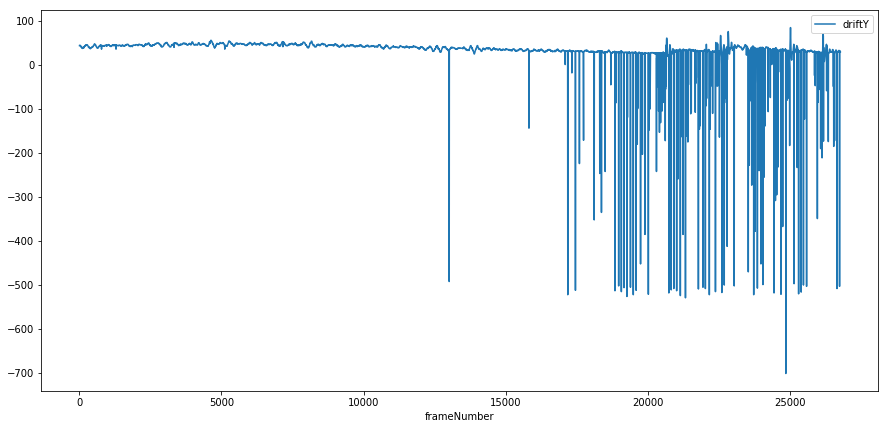

In [62]:
data.plot(x='frameNumber', y='driftY',figsize=(15,7))

In [ ]:
data.plot( x='frameNumber', y='driftY_corrected',figsize=(15,7))

In [75]:
data.loc[data['frameNumber']>20070].loc[data['driftY_corrected'] < -100].count()

frameNumber         7
driftX              7
driftY              7
driftDistance       7
driftAngle          7
driftsCount         7
drifts              7
driftsNoOutliers    7
outlier             7
prevY               7
nextY               7
diffNextPrevY       7
meanY               7
deviationY          7
single_outlier      7
driftY_corrected    7
dtype: int64